# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [354]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [355]:
Diamonds = pd.read_csv('diamonds.csv')
diamonds = Diamonds.copy()
diamonds.sample(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
830,831,0.71,Ideal,H,VVS1,60.4,57.0,2867,5.78,5.81,3.50
20486,20487,1.50,Premium,G,SI2,60.1,59.0,8820,7.38,7.36,4.43
34273,34274,0.28,Ideal,H,VS2,62.5,54.0,467,4.20,4.22,2.63
21474,21475,1.32,Ideal,H,VVS1,62.1,55.0,9572,6.98,7.03,4.35
10512,10513,1.03,Ideal,H,SI1,62.4,56.0,4800,6.45,6.50,4.04
26086,26087,2.08,Premium,I,SI2,61.2,58.0,15321,8.24,8.16,5.02
9856,9857,0.90,Very Good,F,VS2,61.7,56.0,4678,6.18,6.21,3.82
2203,2204,0.73,Ideal,D,SI1,62.4,53.0,3140,5.82,5.79,3.62
51061,51062,0.70,Very Good,I,VS1,62.2,57.0,2332,5.69,5.72,3.55
33267,33268,0.40,Ideal,I,VS1,60.9,56.0,826,4.76,4.80,2.91


# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [356]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [357]:
#diamonds.info()
diamonds.isna().any().any()

False

In [358]:
diamonds.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [359]:
# seems neat to me..

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [360]:
diamonds.shape

(53940, 11)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [361]:
diamonds['clarity_2'] = diamonds['clarity'].copy()
diamonds['clarity_2']= diamonds['clarity_2'].replace('I1', 0)
diamonds['clarity_2']= diamonds['clarity_2'].replace('SI2', 1)
diamonds['clarity_2']= diamonds['clarity_2'].replace('SI1', 2)
diamonds['clarity_2']= diamonds['clarity_2'].replace('VS2', 3)
diamonds['clarity_2']= diamonds['clarity_2'].replace('VS1', 4)
diamonds['clarity_2']= diamonds['clarity_2'].replace('VVS2', 5)
diamonds['clarity_2']= diamonds['clarity_2'].replace('VVS1', 6)
diamonds['clarity_2']= diamonds['clarity_2'].replace('IF', 7)
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [362]:
diamonds['color_2'] = diamonds['color'].copy()
diamonds['color_2']= diamonds['color_2'].replace('J', 0)
diamonds['color_2']= diamonds['color_2'].replace('I', 1)
diamonds['color_2']= diamonds['color_2'].replace('H', 2)
diamonds['color_2']= diamonds['color_2'].replace('G', 3)
diamonds['color_2']= diamonds['color_2'].replace('F', 4)
diamonds['color_2']= diamonds['color_2'].replace('E', 5)
diamonds['color_2']= diamonds['color_2'].replace('D', 6)
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [363]:
diamonds.info()
diamonds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
 11  clarity_2   53940 non-null  int64  
 12  color_2     53940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 5.4+ MB


(53940, 13)

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [364]:
#diamonds.dtypes
# the data types seem ok to me.. maybe objects should be change to strings but i dont know yet..

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [365]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_2,color_2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.051020,3.405803
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.647136,1.701105
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,5.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [366]:
#diamonds.loc[diamonds['x']==0] #yeap, 8 rows
#diamonds.loc[diamonds['y']==0] #yeap, 7 rows
#diamonds.loc[diamonds['z']==0] #yeap, 20 rows

diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0) ]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,3
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,2
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,3
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,4
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,1,4
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,2
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3,3
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,1,2


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [367]:
#dropping 8 rows:
diamonds.drop(diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0)].index, inplace=True)
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0) ]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,3
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,2
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,3
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,4
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3,3
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,1,2
26123,26124,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0,2,1
27112,27113,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0,2,2
27503,27504,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0,3,2


In [368]:
diamonds.loc[2207]['z']

0.0

In [ ]:
#poprawna:
def calculate_z(row):
    return ((row.depth * (row.x + row.y)) / 2)

In [ ]:
diamonds['z'] = diamonds.apply(lambda row: calculate_z(row) if row['z'] ==0 else row['z'], axis=1)

In [377]:
def calculate_z(row):
    ##for row in diamonds: 
    #if qwer.loc[row]['z'] == 0.0:
        #print("K")
    x = (qwer.depth * (qwer.x + qwer.y)) / 2
        #diamonds.loc[row]['z'] = 7
        #diamonds.at['z'][row] = (diamonds.depth * (diamonds.x + diamonds.y)) / 2
        #return (diamonds.at['z'][row])
    return (x)

#df.at['row']['col']
#df[col][row]
#df.loc[row][col]

In [378]:
calculate_z(2314)

5

In [380]:
diamonds.loc[2314]['z']

385.20300000000003

In [382]:
diamonds.loc[2207]

Unnamed: 0       2208
carat               1
cut           Premium
color               G
clarity           SI2
depth            59.1
table              59
price            3142
x                6.55
y                6.48
z             385.037
clarity_2           1
color_2             3
Name: 2207, dtype: object

In [163]:
#Depth = Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

def calculate_z():
    corrected_z = (diamonds.depth * (diamonds.x + diamonds.y)) / 2
    return corrected_z

calculate_z()

0        243.8475
1        231.1270
2        231.0140
3        263.0160
4        275.0385
           ...   
53935    349.9040
53936    360.9320
53937    356.0760
53938    374.2350
53939    363.8700
Length: 53932, dtype: float64

**Apply it just to the rows with incorrect values**

In [418]:
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,foo
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5,E SI2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,E SI1
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5,E VS1
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,I VS2
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,J SI2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6,D SI1
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6,D SI1
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,D SI1
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2,H SI2


In [413]:
def foo(row):
    return row.color+' '+row.clarity

In [419]:
diamonds['foo']=diamonds.apply(foo,axis=1)

In [ ]:
diamonds['z'] = diamonds.apply(lambda row: calculate_z(row) if row['z'] ==0 else row['z'], axis=1)

In [383]:
diamonds.loc[26123]['z']

0.0

In [ ]:
#diamonds = diamonds.apply(lambda x: ((diamonds.depth * (diamonds.x + diamonds.y)) / 2) if x.z == 0 else x)

In [165]:
diamonds = diamonds.assign(new_z=(diamonds.depth * (diamonds.x + diamonds.y)) / 200)

In [166]:
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,new_z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5,2.438475
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,2.311270
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5,2.310140
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,2.630160
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,2.750385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6,3.499040
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6,3.609320
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,3.560760
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2,3.742350


In [167]:
diamonds.loc[diamonds['new_z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,new_z


In [ ]:
#now i can drop column z and change new-z for z, but will try to find better way later

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [168]:
#but we dont have no more zero values in z since we just repaced them with new counted value ???

#diamonds['new_z']=diamonds['new_z'].replace("0.0", np.nan, inplace=True)
#diamonds.info()
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,new_z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5,2.438475
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,2.311270
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5,2.310140
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,2.630160
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,2.750385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6,3.499040
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6,3.609320
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,3.560760
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2,3.742350


----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [173]:
diamonds['new_z'] = diamonds['new_z'].astype(float)
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53932 entries, 0 to 53939
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53932 non-null  int64  
 1   carat       53932 non-null  float64
 2   cut         53932 non-null  object 
 3   color       53932 non-null  object 
 4   clarity     53932 non-null  object 
 5   depth       53932 non-null  float64
 6   table       53932 non-null  float64
 7   price       53932 non-null  int64  
 8   x           53932 non-null  float64
 9   y           53932 non-null  float64
 10  z           53932 non-null  float64
 11  clarity_2   53932 non-null  int64  
 12  color_2     53932 non-null  int64  
 13  new_z       53932 non-null  float64
 14  test_z      53932 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 6.6+ MB


In [ ]:
########### DO IT LATER:
def validate_z():
    return

In [183]:
#im rounding data in my new_z:
#diamonds['new_z'].round(decimals=2)
diamonds=diamonds.round({"new_z":2}) 
diamonds


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,new_z,test_z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5,2.44,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,2.31,False
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5,2.31,False
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,2.63,False
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,2.75,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6,3.50,False
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6,3.61,False
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6,3.56,False
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2,3.74,False


In [190]:
#I am comparing my z and new_z without a function for now:

diamonds['test_z'] = np.where(diamonds['z'] == diamonds['new_z'], 1, 0)

diamonds['test_z'].value_counts()

1    51733
0     2199
Name: test_z, dtype: int64

In [192]:
# and sth is wrong as there are 2199 false, let's see them:
diamonds.loc[diamonds['test_z']==0]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,new_z,test_z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5,2.44,0
96,97,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40,4,4,3.41,0
97,98,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07,1,4,4.05,0
104,105,0.80,Ideal,I,VS1,62.9,56.0,2760,5.94,5.87,3.72,4,1,3.71,0
151,152,0.74,Ideal,I,SI1,61.3,56.0,2769,5.82,5.86,3.57,2,1,3.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53742,53743,0.74,Ideal,G,VS2,62.9,54.0,2723,5.81,5.78,3.64,3,3,3.65,0
53757,53758,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34,3,4,3.33,0
53814,53815,0.77,Good,H,VVS2,64.3,57.9,2734,5.70,5.86,3.71,5,2,3.72,0
53839,53840,0.71,Ideal,G,SI1,61.6,57.0,2738,5.72,5.76,3.53,2,3,3.54,0


In [ ]:
#2199 rows are false, means that z or depth in 2199 rows is calculated incorrectly or it is a matter of rounding

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [170]:
diamonds.isna()
# no nans so i wont do nthn  :)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,new_z
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [194]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,clarity_2,color_2,new_z,test_z
count,53932.00000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,26970.48804,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.539259,3.051101,3.405789,3.540057,0.959226
std,15571.46971,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.704434,1.647109,1.701165,0.695584,0.197767
min,1.00000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000,0.000000,0.000000,2.240000,0.000000
25%,13485.75000,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000,2.000000,2.000000,2.910000,1.000000
50%,26971.50000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,3.530000,1.000000
75%,40455.25000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,4.000000,5.000000,4.040000,1.000000
max,53940.00000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000,19.730000,1.000000


In [33]:
#your comments here

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [35]:
#your code here

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

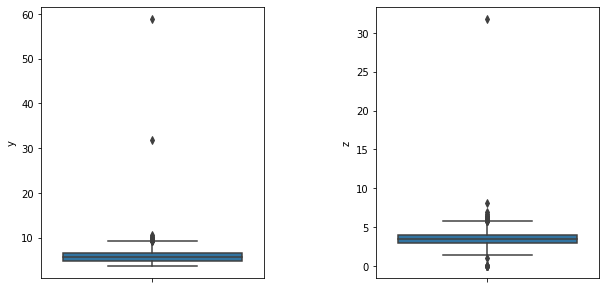

In [195]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [198]:
diamonds.loc[(diamonds['y']>10) | (diamonds['z']>10)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_2,color_2,new_z,test_z
24067,24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,1,2,19.73,0
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0,1,6.17,1
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0,6.97,0
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0,0,6.71,0
48410,48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,4,5,3.17,0
49189,49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,4,5,11.42,0


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [ ]:
diamonds['z']['48410'] = (diamonds.depth * (diamonds.x + diamonds.y)) / 200

In [204]:
diamonds.loc[48410]

Unnamed: 0        48411
carat              0.51
cut           Very Good
color                 E
clarity             VS1
depth              61.8
table              54.7
price              1970
x                  5.12
y                  5.15
z                  31.8
clarity_2             4
color_2               5
new_z              3.17
test_z                0
Name: 48410, dtype: object

Let's check if we actually corrected the outlier.

In [42]:
diamonds.loc[48410]

carat           0.51
cut        Very Good
color              5
clarity            4
depth           61.8
table           54.7
price           1970
x               5.12
y               5.15
z               3.17
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [43]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [48]:
#your code here

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [50]:
#your code here

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

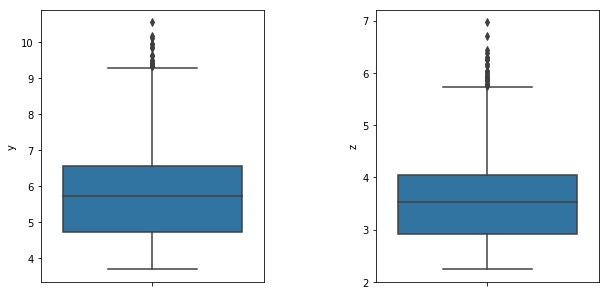

In [60]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [61]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [62]:
#your code here